# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

Let $R(t)$ denote the response rate of template, $t$.

Let $t_{new}$ denote the "new" template and $t_{current}$ denote the current template.

Then:
<p><br>

$H_0: |R(t_{new}) - R(t_{current})| < 0.01$.

<p><br><br>
Thus, <b>we must execute a one-sided test</b>.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

$H_1: |R(t_{new}) - R(t_{current})| \ge 0.01$.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
np.random.seed(42)

def solve_sample_size_required(delta_means, sd, alpha, target_power, n_sim=10000, starting_sample_size=12):
    power_sample = []
    current_power = 0
    es = delta_means
    
    sample_size = starting_sample_size
    
    # Keep iterating as shown above until desired power is obtained
    while current_power < target_power:
        control_dists = np.random.normal(loc=0, scale=sd, size=[n_sim, sample_size]) # simulate n_sim samples of size sample_size
        experimental_dists = np.random.normal(loc=delta_means, scale=sd, size=[n_sim, sample_size])
        t_test = stats.ttest_ind(control_dists, experimental_dists, axis=1) # does a two-sided test, but based on H_0 we need a one-sided test (see below)
        
        p = t_test[1]/2 #t_test[1] contains the list of all n_sim p-values for this sample size, but we need to divide by 2 to get one-sided

        num_null_rejects = np.sum(p < alpha)
        current_power = num_null_rejects/len(p)

        power_sample.append((sample_size, current_power))

        sample_size += 1
        
    return power_sample

In [3]:
# Calculate the required sample size
raw_effect_size = 0.01 # not normalized
sd = .0475
alpha = 0.05
n_sim = 10000
target_power = 0.8

power_sample = solve_sample_size_required(raw_effect_size, sd, alpha, target_power, n_sim)
print(f"solve_sample_size_required: target power={target_power} reached with sample size {power_sample[-1][0]} over {n_sim} simulations for each sample size tested: final power realized={power_sample[-1][1]}")

solve_sample_size_required: target power=0.8 reached with sample size 280 over 10000 simulations for each sample size tested: final power realized=0.8051


In [4]:
#confirm with TTestIndPower
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()
normalized_es = raw_effect_size/sd
# per documentation, TTestIndPower.solve_power(), power is calculated by default using a two-sided test, but based on H_0, we need a one-sided test
req_sample_size = power_analysis.solve_power(alpha=alpha, effect_size=normalized_es, power=target_power, alternative='larger')
print(f"TTestIndPower.solve_power: target power={target_power} and (normalized) effect size = {normalized_es} requires sample size {req_sample_size}")

TTestIndPower.solve_power: target power=0.8 and (normalized) effect size = 0.21052631578947367 requires sample size 279.6667468021971


In [5]:
print(f"solving manually req. sample size {power_sample[-1][0]}; solving with TTestIndPower.solve_power() req. sample size {req_sample_size}")

solving manually req. sample size 280; solving with TTestIndPower.solve_power() req. sample size 279.6667468021971


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

min sample size to reach target power 0.8 for raw effect size 0.005 and alpha 0.01: NaN (out of bounds for range(10, 501)
min sample size to reach target power 0.8 for raw effect size 0.01 and alpha 0.01: NaN (out of bounds for range(10, 501)
min sample size to reach target power 0.8 for raw effect size 0.02 and alpha 0.01: 134
min sample size to reach target power 0.8 for raw effect size 0.03 and alpha 0.01: 61


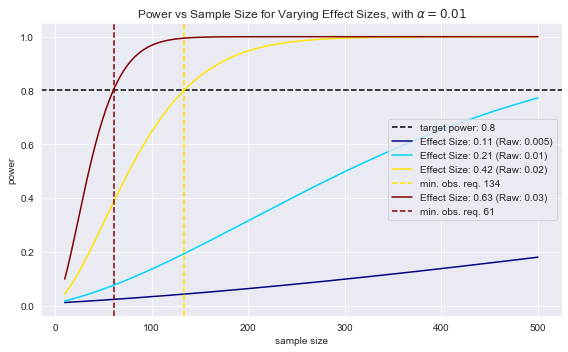

min sample size to reach target power 0.8 for raw effect size 0.005 and alpha 0.05: NaN (out of bounds for range(10, 501)
min sample size to reach target power 0.8 for raw effect size 0.01 and alpha 0.05: 356
min sample size to reach target power 0.8 for raw effect size 0.02 and alpha 0.05: 90
min sample size to reach target power 0.8 for raw effect size 0.03 and alpha 0.05: 41


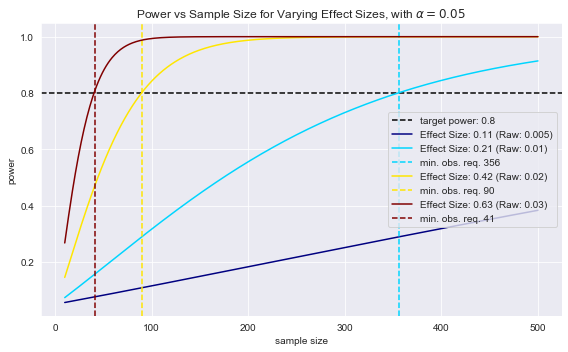

min sample size to reach target power 0.8 for raw effect size 0.005 and alpha 0.1: NaN (out of bounds for range(10, 501)
min sample size to reach target power 0.8 for raw effect size 0.01 and alpha 0.1: 280
min sample size to reach target power 0.8 for raw effect size 0.02 and alpha 0.1: 71
min sample size to reach target power 0.8 for raw effect size 0.03 and alpha 0.1: 32


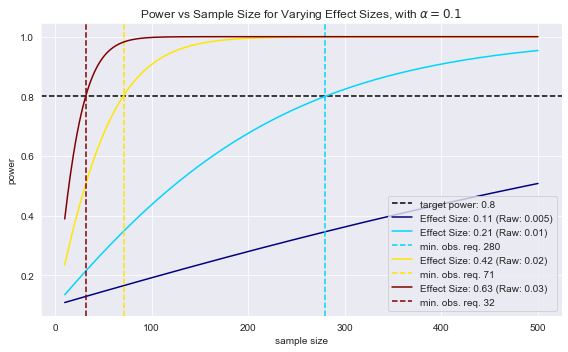

{0.01: {0.005: None, 0.01: None, 0.02: 134, 0.03: 61}, 0.05: {0.005: None, 0.01: 356, 0.02: 90, 0.03: 41}, 0.1: {0.005: None, 0.01: 280, 0.02: 71, 0.03: 32}}


In [6]:
#Your code; plot power curves for the various alpha and effect size combinations

import matplotlib.colors as colors
import matplotlib.cm as cmx

alphas = [.01, .05, .1]
raw_effect_sizes = [.005, .01, .02, .03]

cvals = range(len(raw_effect_sizes))
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=cvals[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

d_min_ss = {}

for alpha in alphas:
    #new figure for each alpha
    fig = plt.figure(figsize=(8,5))
    plt.axhline(y=target_power, linestyle='--', color='black', label=f"target power: {target_power}")

    d_min_ss[alpha] = {}
    d_alpha = d_min_ss[alpha]

    for idx, raw_effect_size in enumerate(raw_effect_sizes):
        power_sample = []

        d_alpha[raw_effect_size] = None

        ss_range = range(10, 501)
        for sample_size in ss_range:
            # use the same std dev as above
            normalized_effect_size = raw_effect_size/sd
            pwr = power_analysis.solve_power(effect_size=normalized_effect_size, alpha=alpha, nobs1=sample_size)
            power_sample.append((sample_size, pwr))

        df_power_sample = pd.DataFrame(power_sample, columns=['sample_size', 'power'])

        # first plot power curve
        colorVal = scalarMap.to_rgba(cvals[idx])
        plt.plot(df_power_sample['sample_size'], df_power_sample['power'], color=colorVal, label=f"Effect Size: {round(normalized_effect_size, 2)} (Raw: {raw_effect_size})")

        # then plot min sample size for target power
        df_power_sample['delta_t_pwr'] = df_power_sample['power']-target_power
        min_delta_t_pwr = df_power_sample[df_power_sample.delta_t_pwr >= 0].delta_t_pwr.min()
        df_min_delta_t_pwr = df_power_sample[df_power_sample.delta_t_pwr==min_delta_t_pwr]
        if len(df_min_delta_t_pwr.sample_size.values) > 0:
            min_sample_size_req = df_min_delta_t_pwr.sample_size.values[0]
            print(f"min sample size to reach target power {target_power} for raw effect size {raw_effect_size} and alpha {alpha}: {min_sample_size_req}")
            d_alpha[raw_effect_size] = min_sample_size_req
            plt.axvline(x=min_sample_size_req, linestyle='--', color=colorVal, label=f"min. obs. req. {min_sample_size_req}")
        else:
            print(f"min sample size to reach target power {target_power} for raw effect size {raw_effect_size} and alpha {alpha}: NaN (out of bounds for {ss_range}")
            

    plt.xlabel("sample size")
    plt.ylabel("power")
    plt.title("Power vs Sample Size for Varying Effect Sizes, with $\\alpha=" + str(alpha) + "$")
    plt.legend()
    fig.tight_layout()
    plt.show();

print(d_min_ss)

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

1. (Raw) effect size, or $|R(t_{new}) - R(t_{current})| = 0.05$ does not reach the desired power of 0.8 <i>for a <b>reasonable</b> sample size</i> (for any value of $\alpha$ considered).

2. A similar argument can be made against using $|R(t_{new}) - R(t_{current})| = 0.01$ since it would require an unreasonable sample-size (number of observations) in order to reach the desired target power value of $0.8$.

3. Thus, we may consider $|R(t_{new}) - R(t_{current})| = 0.02$ or $|R(t_{new}) - R(t_{current})| = 0.03$.  Let's restrict this further.

    1. For $\alpha=0.1$
    
        1. $|R(t_{new}) - R(t_{current})| = 0.03$ only requires 32 observations (sample size)

        2. $|R(t_{new}) - R(t_{current})| = 0.02$ requires 71 observations.

    2. For $\alpha=0.05$

        1. $|R(t_{new}) - R(t_{current})| = 0.03$ only requires 41 observations (sample size)

        2. $|R(t_{new}) - R(t_{current})| = 0.02$ requires 90 observations.


But we are more likely to encounter type II errors with $\alpha=0.1$ than we are with $\alpha=0.05$

Therefore, we settle on: 

1. $\alpha=0.05$
2. $\beta=1-0.8=0.2$ ($\beta = 1 - power$).
3. $|R(t_{new}) - R(t_{current})| = 0.03$
4. sample size (number of observations): 41

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.